# OpenCV란 
- Open Source Computer Vision Libraty의 약어
- 컴퓨터 비전, 머신러닝 관련 다양한 라이브러리 지원
- Python, Java, JavaScript 등 인터페이스 제공
- C/C++로 개발되어 기능이 빠르게 작동함
- 1996년에 인텔에서 시작된 프로젝트임
- OpenCV + Python
  - C/C++로 된 OpenCV 라이브러리를 파이썬 래퍼로 감싼 후 파이썬 모듈을 추가 시킴
  - 이미지 처리에서 속도가 필요한 부분을 C/C++로 처리하고 파이썬에서 불러와 사용할 수 있음 -> 속도 및 효율이 좋다
  - OpenCV 배열은 Numpy 배열로 변환되어 내부 처리 수행

## OpenCV 주요기능
- 이미지처리 : 이미지 파일의 읽기 및 쓰기부터 변환, 필터링, 특징 추출, 이미지 복원등
- 영상처리 : 비디오 파일의 읽기 및 쓰기, 스트림 처리, 카메라 출력 등
- 컴퓨터 비전 : 객체 탐지, 광학 문자 인식 (OCR), 투영 변환, 얼굴 인식 등
- 기계 학습 : 머신러닝 알고리즘 제공 및 학습 결과 시각화

In [1]:
import cv2

### 이미지 읽고 출력
- cv2 사용
- matplotlib 사용

In [2]:
# 이미지 파일 읽어오기
img = cv2.imread('images/ironman.png', cv2.IMREAD_COLOR)

# 이미지 출력
cv2.imshow('wicked', img)

# 창닫기
cv2.waitKey(5000) # 입력된 시간 동안 키보드 입력 대기
# 0 -> 무한대기, 1000 -> 1초 (ms 단위, 1/1000초)
cv2.destroyAllWindows()

In [3]:
# matplotlib 사용 이미지 출력
import matplotlib.pyplot as plt

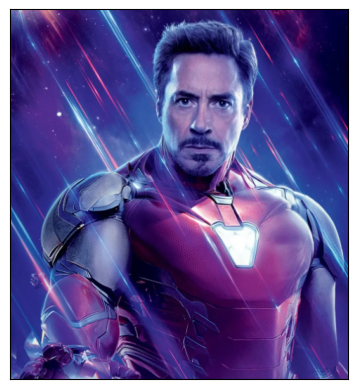

In [4]:
img = cv2.imread('images/ironman.png', cv2.IMREAD_COLOR)

# BGR(cv2) -> RGB(plt) 색 공간 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.xticks([]), plt.yticks([])
plt.imshow(img)

In [ ]:
# cv2로 읽어온(imread) 데이터는 np.array 타입
img

### 동영상 출력

In [5]:
# 카메라 연결 하는법 -> VideoCapture(0)
cap = cv2.VideoCapture('images/cute.mp4')

# 비디오가 캡쳐되면
while cap.isOpened():
    # ret : 읽기 성공 여부 (T/F)
    # frame : 영상에 포함된 1장의 이미지
    ret, frame = cap.read() # 동영상의 한 프레임 읽기

    # 읽기 실패일 경우 (ex. 프레임을 읽지 못햇거나, 전체 영상 플레이 완료)
    if not ret:
        print("이미지 읽기 실패 혹은 전체 영상 플레이 완료")
        break

    cv2.imshow("video", frame)

    key = cv2.waitKey(33) # 키보드 입력값 변수에 담기

    # 영상 재생 종료 기능 (키보드 누르면)
    if key == 49:  # 숫자 1
        break

cap.release()
cv2.destroyAllWindows()

### 동영상에서 하나의 프레임을 이미지 파일로 저장하기
캡쳐기능

In [9]:
cap = cv2.VideoCapture('images/cute.mp4')

# 저장할 파일명을 구분시킬 카운터
cnt = 0

# 비디오가 캡쳐되면
while cap.isOpened():
    # ret : 읽기 성공 여부 (T/F)
    # frame : 영상에 포함된 1장의 이미지
    ret, frame = cap.read() # 동영상의 한 프레임 읽기

    # 읽기 실패일 경우 (ex. 프레임을 읽지 못햇거나, 전체 영상 플레이 완료)
    if not ret:
        print("이미지 읽기 실패 혹은 전체 영상 플레이 완료")
        break

    cv2.imshow("video", frame)

    key = cv2.waitKey(33) # 키보드 입력값 변수에 담기

    # 영상 재생 종료 기능 (키보드 누르면)
    if key == 49:  # 숫자 1
        break

    elif key == 50: # 숫자 2
        cnt+=1

        print(f"이미지 파일{cnt} 저장")
        cv2.imwrite(f"./images/img_file{cnt}.png", frame,
                    params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) # png 파일을 압축하겠다.
                    # IMWRITE_PNG_COMPRESSION : 압축 설정 , 0 ~ 9 (0은 압축X)
cap.release()
cv2.destroyAllWindows()

이미지 파일1 저장
이미지 파일2 저장


### 재생되고 있는 영상 저장하기
동영상 녹화 혹은 CCTV 기능 등

In [10]:
cap = cv2.VideoCapture('images/cute.mp4')

# 녹화를 위한 설정
fps = 30

# 영상 크기 (가로, 세로)
w = int(cap.get(3))
h = int(cap.get(4))

# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX")

# 녹화 파일 설정
out = cv2.VideoWriter("images/record.avi", codec, fps, (w,h))

# 녹화 여부 설정
record = False

# 비디오가 캡쳐되면
while cap.isOpened():
    # ret : 읽기 성공 여부 (T/F)
    # frame : 영상에 포함된 1장의 이미지
    ret, frame = cap.read() # 동영상의 한 프레임 읽기

    # 읽기 실패일 경우 (ex. 프레임을 읽지 못햇거나, 전체 영상 플레이 완료)
    if not ret:
        print("이미지 읽기 실패 혹은 전체 영상 플레이 완료")
        break

    cv2.imshow("video", frame)

    key = cv2.waitKey(33) # 키보드 입력값 변수에 담기

    # 영상 재생 종료 기능 (키보드 누르면)
    if key == 49:  # 숫자 1
        break
    elif key == 50: # 숫자 2
        print(f"녹화 시작")
        record = True

    if record:
        out.write(frame)

cap.release()
cv2.destroyAllWindows()

녹화 시작


### 흑백(Gray) 이미지 만들기
- 0 ~ 255의 픽셀 값으로 구성된 2차원 이미지
- 0 : 검정, 255 : 흰색

### 이진(Binary) 이미지 만들기
- 이진이미지 : 픽셀 값이 0과 1(255)로 구성


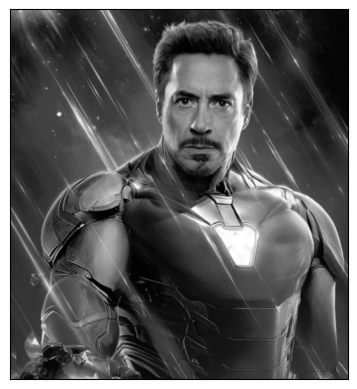

In [ ]:
# 컬러 이미지로 불러와 흑백으로 바꾸는 방법 (컬러, 흑백 정보 둘 다 이용 가능)
img = cv2.imread('images/ironman.png', cv2.IMREAD_COLOR)

# BGR(cv2) -> RGB(plt) 색 공간 변환
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([]), plt.yticks([])
plt.imshow(img2, cmap='gray')

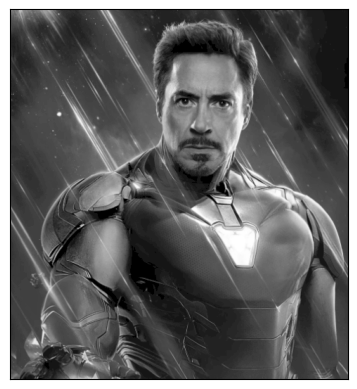

In [18]:
# 흑백 이미지로 읽어오기(read) 컬러 정보 X
img = cv2.imread('images/ironman.png', cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')

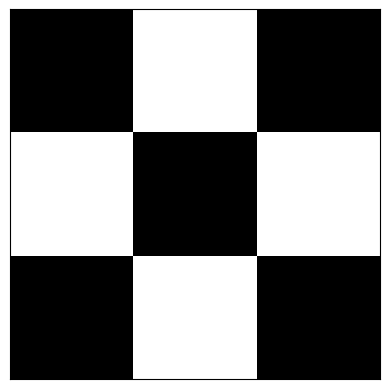

In [14]:
# 흑백 이미지로 읽어오기(read) 컬러 정보 X
img = cv2.imread('images/board.png', cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')

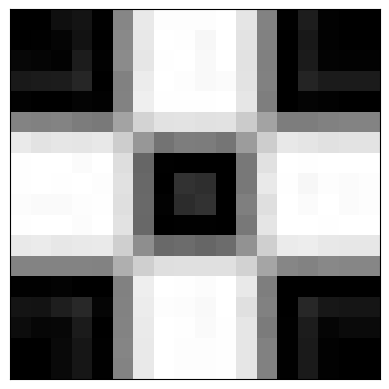

In [16]:
img = cv2.imread('images/board_fuzzy.jpg', cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img, cmap='gray')

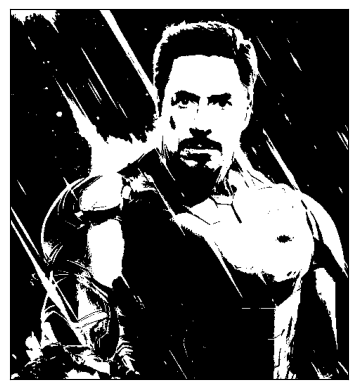

In [23]:
# 흑백
img = cv2.imread('images/ironman.png', cv2.IMREAD_GRAYSCALE)

# 이진
# threshold(이미지, 문턱값(기준값), 기준보다 클 때 적용시킬 값, 적용 방법)
_, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.xticks([]), plt.yticks([])
plt.imshow(thresh, cmap='gray')